In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=970da6165346fbdf543ce24d841f7c097fbaa6bedc91dc49b997ee3105ac8f83
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import month

In [3]:
#Creating spark session
spark = SparkSession.builder \
    .appName("TravelerVolumesAnalysis") \
    .getOrCreate()


In [4]:
#Loading CSV data from Goverment of Canada
data = spark.read.csv("/open-government-traveller-report-daily-en.csv", header=True, inferSchema=True)

In [7]:
#Renaming Column for convenience
data = data.withColumnRenamed("Date", "Travel Date") \
           .withColumnRenamed("Sum of Volume", "Volume")

In [9]:
#Abstracting Month from Travel Date
data = data.withColumn("Month", month("Travel Date"))

In [10]:
#Grouping data by Volume
grouped_data = data.groupBy("Port of Entry", "Month", "Region", "Mode").sum("Volume")

In [11]:
grouped_data.show()

+--------------------+-----+--------------------+------+-----------+
|       Port of Entry|Month|              Region|  Mode|sum(Volume)|
+--------------------+-----+--------------------+------+-----------+
|3670 - Stanstead ...|    2|       Quebec Region|  Land|       4258|
|8135 - Douglas Pa...|    2|      Pacific Region|  Land|     272492|
|5053 - South Junc...|    4|      Prairie Region|  Land|       4529|
|3670 - Stanstead ...|    5|       Quebec Region|  Land|       6530|
|      8320 - Chopaka|    6|      Pacific Region|  Land|        856|
|3380 - Clarenceville|    7|       Quebec Region|  Land|       8764|
|  4750 - Thunder Bay|    7|Northern Ontario ...|   Air|         28|
|4090 - Cornwall -...|    8|Northern Ontario ...|  Land|     139127|
|8211 - VIA Commer...|    8|      Pacific Region|   Air|         41|
|4952 - Billy Bish...|    9|Greater Toronto A...|   Air|       6569|
|                 TRC|    1|       Quebec Region|   Air|       2359|
|                 TRC|    3|Southe

Trend Analysis

In [13]:
trend_data = grouped_data.groupBy("Month", "Port of Entry").sum("sum(Volume)")
trend_data.show()

+-----+--------------------+----------------+
|Month|       Port of Entry|sum(sum(Volume))|
+-----+--------------------+----------------+
|    6| 9111 - Corner Brook|             212|
|    8|4272 - Rainbow Br...|          498596|
|    1|3360 - St Just de...|             819|
|    3|4522 - Windsor Tu...|             606|
|    9|4171 - Hamilton A...|             486|
|    2|    3340 - Highwater|           10243|
|    3|   2130 - Edmundston|           42260|
|    6|     8140 - Kamloops|              25|
|    7|2100 - Saint John...|           14169|
|    8|         5073 - Lena|            2798|
|    6|2190 - River de C...|             434|
|    5|2140 - Perth/Andover|           15017|
|    8|        3040 - Gaspe|              28|
|    6|8115 - Belleville...|           14265|
|    1|4090 - Cornwall -...|          106598|
|    8|       4650 - Sombra|            5547|
|    8|       6100 - Oungre|            4114|
|    7|   3010 - Chicoutimi|            5373|
|    5|3360 - St Just de...|      

Comparing Volumes by Different Port of Entry

In [14]:
port_entry_volumes = grouped_data.groupBy("Port of Entry").sum("sum(Volume)")
port_entry_volumes.show()

+--------------------+----------------+
|       Port of Entry|sum(sum(Volume))|
+--------------------+----------------+
|   2130 - Edmundston|          367958|
|      8270 - Kitimat|             272|
|  2340 - Forest City|            1945|
|2120 - Woodstock ...|          302654|
|    3340 - Highwater|           88105|
|8211 - VIA Commer...|             449|
|6025 - North Port...|          101109|
|8135 - Douglas Pa...|         2938920|
|       3300 - Dundee|           86897|
|8520 - Osoyoos - ...|            1772|
|4391 - Prescott -...|           20126|
|8111 - Victoria A...|          823776|
|  2170 - Grand Falls|           62431|
|  4880 - Rainy River|          212675|
|2100 - Saint John...|           51611|
|8131 - Pacific Hi...|          294259|
|       5030 - Gretna|           49466|
|4273 - Queenston ...|         2189802|
|     3180 - Abercorn|           66225|
|6043 - Regina - C...|               2|
+--------------------+----------------+
only showing top 20 rows



Analyzing Regional Variations

In [15]:
regional_volumes = grouped_data.groupBy("Region", "Port of Entry").sum("sum(Volume)")
regional_volumes.show()

+--------------------+--------------------+----------------+
|              Region|       Port of Entry|sum(sum(Volume))|
+--------------------+--------------------+----------------+
|      Prairie Region|   5071 - Boissevain|           94794|
|Northern Ontario ...|4115 - Sandpoint ...|           12316|
|     Atlantic Region|   2050 - Four Falls|            6904|
|      Prairie Region|      6103 - Torquay|            1301|
|      Pacific Region|8113 - Victoria -...|           11928|
|     Atlantic Region|  2150 - Centreville|           58417|
|      Pacific Region|8093 - Vancouver ...|           24210|
|      Pacific Region|8135 - Douglas Pa...|         2938920|
|      Prairie Region|5102 - James Arms...|          242776|
|Southern Ontario ...|4272 - Rainbow Br...|         2542635|
|       Quebec Region|    3611 - Sept-Iles|            5534|
|      Pacific Region|8117 - Blackball ...|          114257|
|      Prairie Region|5022 - Emerson  -...|          162652|
|      Pacific Region|  

Creating Data Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#Converting PySpark datafram to pandas dataframe for data visualization
import pandas
trend_data_pd = pandas.DataFrame(trend_data.toPandas())
port_entry_volumes_pd = port_entry_volumes.toPandas()
regional_volumes_pd = regional_volumes.toPandas()

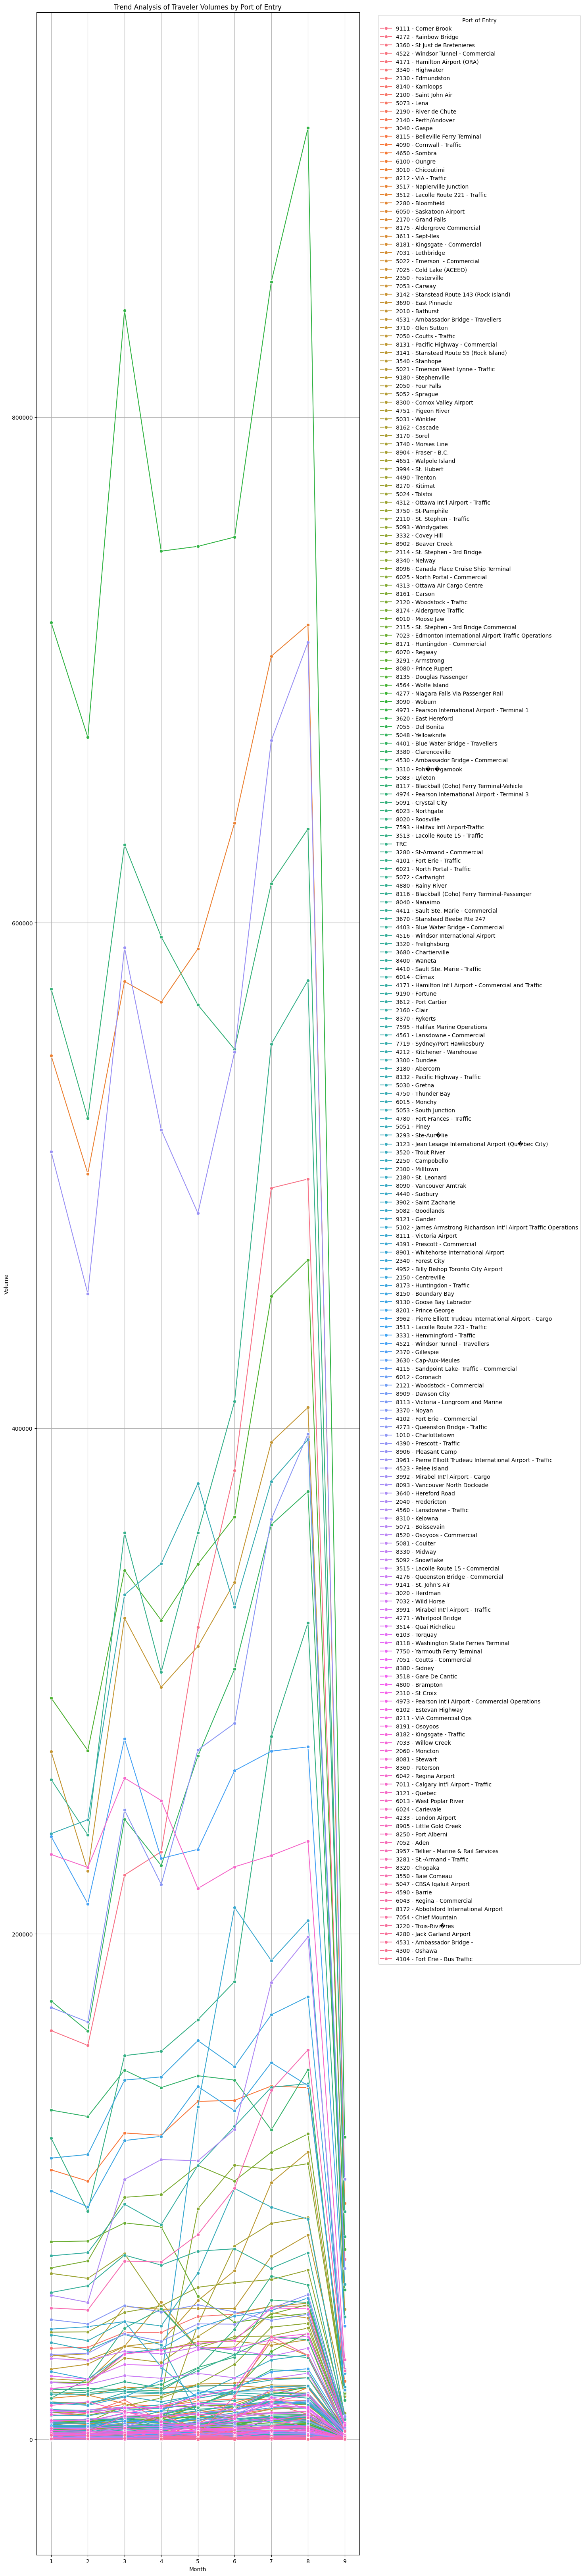

In [24]:
plt.figure(figsize=(15, 65))
sns.lineplot(data=trend_data_pd, x="Month", y="sum(sum(Volume))", hue="Port of Entry", marker="o")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.title("Trend Analysis of Traveler Volumes by Port of Entry")
plt.legend(title="Port of Entry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-25-18545dc42e45>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


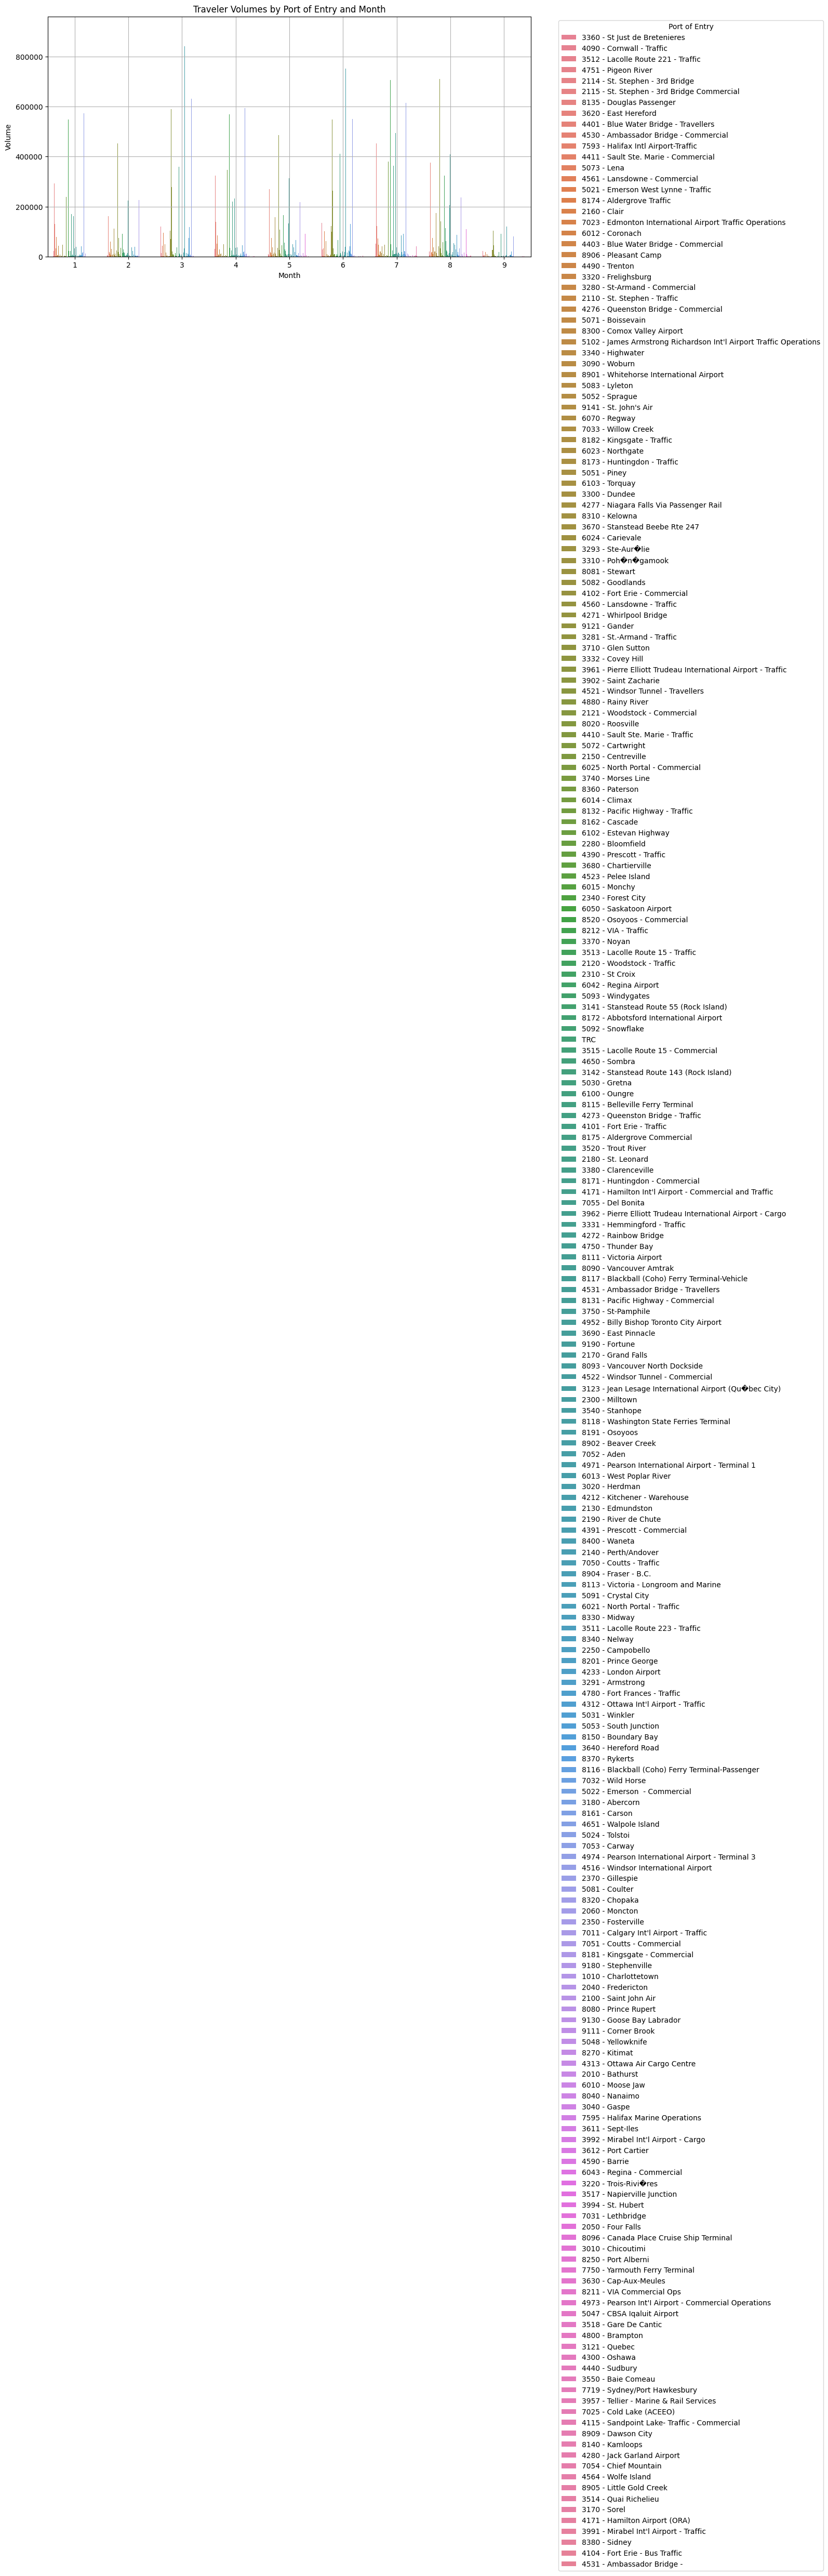

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=trend_data_pd, x="Month", y="sum(sum(Volume))", hue="Port of Entry")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.title("Traveler Volumes by Port of Entry and Month")
plt.legend(title="Port of Entry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

Making the above two plots was probably not a good idea


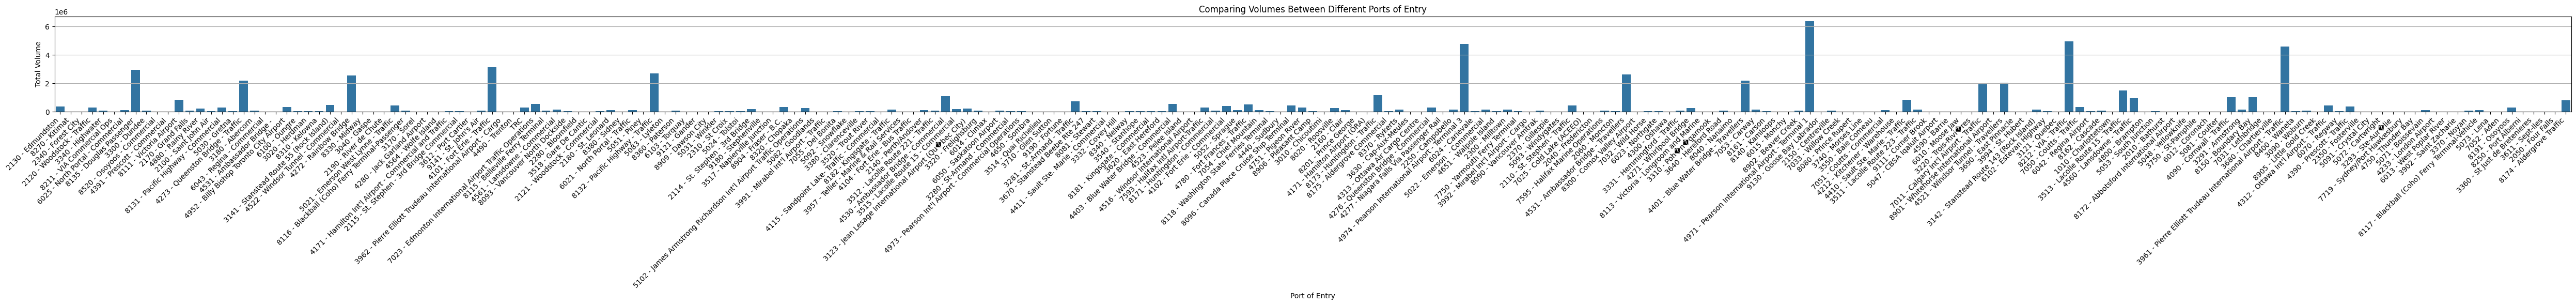

In [30]:
plt.figure(figsize=(50, 6))
sns.barplot(data=port_entry_volumes_pd, x="Port of Entry", y="sum(sum(Volume))")
plt.xlabel("Port of Entry")
plt.ylabel("Total Volume")
plt.title("Comparing Volumes Between Different Ports of Entry")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

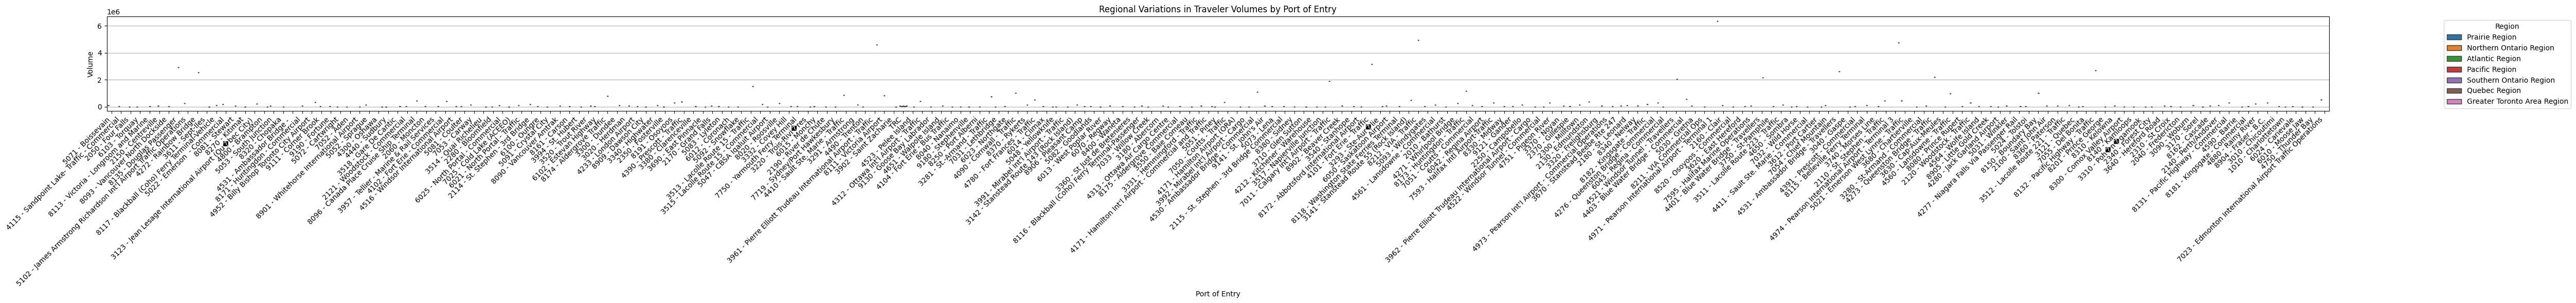

In [32]:
plt.figure(figsize=(50, 6))
sns.boxplot(data=regional_volumes_pd, x="Port of Entry", y="sum(sum(Volume))", hue="Region")
plt.xlabel("Port of Entry")
plt.ylabel("Volume")
plt.title("Regional Variations in Traveler Volumes by Port of Entry")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [33]:
#Making Some Predictions using Linear Regression on PySpark
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [35]:
#converting PySpark data frame to Pandas data frame
trend_data_spark = spark.createDataFrame(trend_data_pd)

In [36]:
assembler = VectorAssembler(inputCols=["Month"], outputCol="features")
data = assembler.transform(trend_data_spark).select("features", "sum(sum(Volume))")

In [37]:
#Defining features as Month and target variable as Volume
assembler = VectorAssembler(inputCols=["Month"], outputCol="features")
data = assembler.transform(trend_data_spark).select("features", "sum(sum(Volume))")

In [38]:
#Having a 80 - 20 split (randomly)
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [43]:
# Converting trend_data_pd to a Spark DataFrame
trend_data_spark = spark.createDataFrame(trend_data_pd)

# Data Cleaning by removing missing values
trend_data_spark_cleaned = trend_data_spark.dropna()

# Define features (Month) and target variable (Volume)
assembler = VectorAssembler(inputCols=["Month"], outputCol="features")
data = assembler.transform(trend_data_spark_cleaned).select("features", "sum(sum(Volume))")

# Split data into training and testing sets (80% training, 20% testing)
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Build and train a linear regression model
lr = LinearRegression(featuresCol="features", labelCol="sum(sum(Volume))")
lr_model = lr.fit(train_data)

In [45]:
#Build and train a linear regression model
lr = LinearRegression(featuresCol="features", labelCol="sum(sum(Volume))")
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Show predictions
predictions.select("features", "sum(sum(Volume))", "prediction").show()

+--------+----------------+------------------+
|features|sum(sum(Volume))|        prediction|
+--------+----------------+------------------+
|   [1.0]|            76.0| 42502.91218479719|
|   [1.0]|           216.0| 42502.91218479719|
|   [1.0]|           402.0| 42502.91218479719|
|   [1.0]|           455.0| 42502.91218479719|
|   [1.0]|           874.0| 42502.91218479719|
|   [1.0]|          1142.0| 42502.91218479719|
|   [1.0]|          2145.0| 42502.91218479719|
|   [1.0]|          4287.0| 42502.91218479719|
|   [1.0]|          6866.0| 42502.91218479719|
|   [1.0]|          6973.0| 42502.91218479719|
|   [1.0]|          7505.0| 42502.91218479719|
|   [1.0]|          9838.0| 42502.91218479719|
|   [1.0]|         10784.0| 42502.91218479719|
|   [1.0]|         16301.0| 42502.91218479719|
|   [1.0]|         32979.0| 42502.91218479719|
|   [1.0]|         58077.0| 42502.91218479719|
|   [1.0]|        238510.0| 42502.91218479719|
|   [2.0]|           751.0|41630.028735311964|
|   [2.0]|   

In [46]:
#Evaluating the above prediction
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="sum(sum(Volume))", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

In [47]:
print("Root Mean Squared Error (RMSE) on test data:", rmse)

Root Mean Squared Error (RMSE) on test data: 84701.7988272626


The above RMSE value is much much much much higher than expected so we would need a better model